In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from konlpy.tag import Okt


In [2]:
reviews_df = pd.read_csv("./data/뱅뱅막국수_reviews_추천순.csv")

In [3]:
reviews_df

,Index,Date,Review
0,1,2024년 11월 7일 목요일,그 유명한 맛집 뱅뱅막국수 다녀왔습니당 주문하고 바로 뽑아내는 메밀 자가제면이라 면...
1,2,2024년 11월 4일 월요일,도곡동맛집 뱅뱅막국수는 유튜브 먹방에서 보고 찾아갔어요.진짜 점심때 사람이 많아 맛...
2,3,2024년 11월 3일 일요일,처음 방문해봤는데.. 웨이팅이 있을만하네요👍 애매한 시간에 가서 바로 들어갔고\n양...
3,4,2024년 10월 14일 월요일,뱅뱅막국수!\n강남 도곡동 뱅뱅사거리 막국수 맛집!이네요.뱅뱅 돌린 메밀면에 돌돌 ...
4,5,2024년 10월 16일 수요일,강남역 최애 맛집 뱅뱅막국수 다녀왔습니다 🍜✨\n\n오늘 간만에 와이프와 늦은 점심...
...,...,...,...
983,984,2024년 8월 6일 화요일,참기름 막국수랑 육전 조합 최고에요!!\n맛집으로 추천합니다❤️
984,985,2024년 4월 30일 화요일,저녁시간에 가서 웨이팅 있었습니다. 자극적이지 않고 맛있었어요 :)
985,986,2024년 7월 4일 목요일,깔끔하고 단백하고 너무 맛있어요 ^^
986,987,2024년 7월 20일 토요일,양재역 근처 맛집입니다!! 우연히 들어가서 먹었는데 너무 맛있었어요 ㅎㅎ 더운 여름...


In [5]:
reviews_df.columns

Index(['Index', 'Date', 'Review'], dtype='object')

In [ ]:
reviews_df[[]]

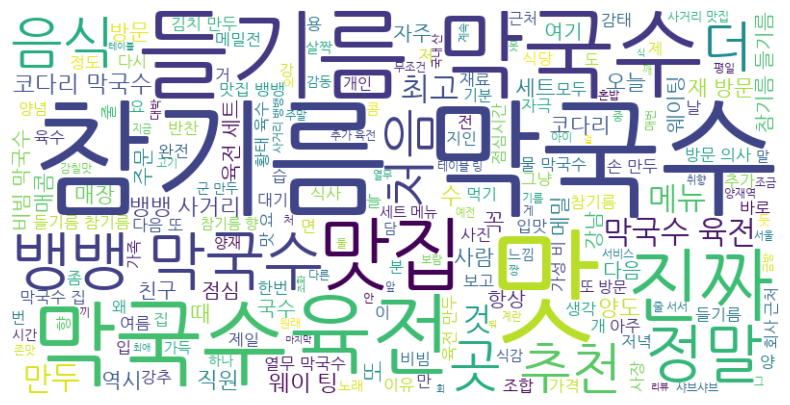

In [6]:
# 텍스트 데이터 전처리
text_data = ' '.join(review for review in reviews_df['Review'].astype(str))

# 형태소 분석기 (Okt) 사용하여 명사 추출
okt = Okt()
nouns = okt.nouns(text_data)
nouns_text = ' '.join(nouns)

# WordCloud 생성
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 경로 (윈도우 기준)
    width=800,
    height=400,
    background_color='white'
).generate(nouns_text)

# WordCloud 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
from nltk import FreqDist

In [8]:
from matplotlib import font_manager, rc

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'  # 'NanumGothic'이 설치된 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

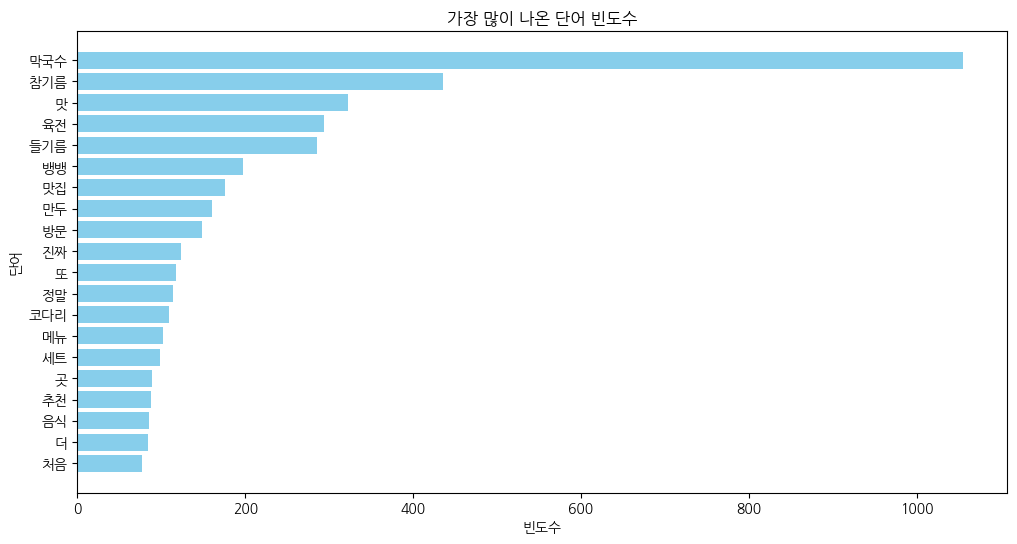

In [10]:
# 텍스트 데이터 전처리
text_data = ' '.join(review for review in reviews_df['Review'].astype(str))

# 형태소 분석기 (Okt) 사용하여 명사 추출
okt = Okt()
nouns = okt.nouns(text_data)

# 단어 빈도수 계산
word_freq = FreqDist(nouns)

# 가장 많이 나온 상위 20개 단어 선택
top_words = word_freq.most_common(20)

# 단어와 빈도수를 분리
words = [word for word, freq in top_words]
frequencies = [freq for word, freq in top_words]

# 막대그래프 생성
plt.figure(figsize=(12, 6))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('가장 많이 나온 단어 빈도수')
plt.gca().invert_yaxis()  # 빈도수가 높은 단어가 위로 오도록 설정
plt.show()

In [11]:
from collections import Counter

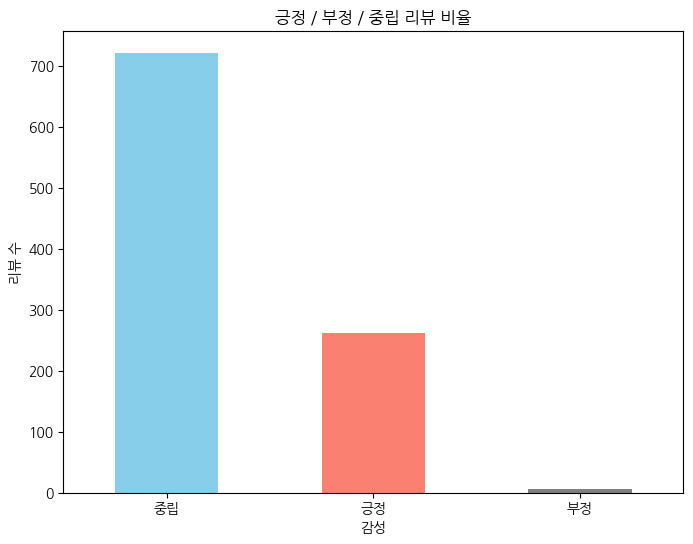

In [12]:
# 감성 사전 로드
# 간단한 긍정/부정 단어 리스트를 정의 (한국어 감성 사전을 사용하는 것이 이상적)
positive_words = ["맛있", "좋다", "최고", "추천", "친절", "감사", "훌륭", "깔끔", "행복","존맛","JMT","맛집",]
negative_words = ["맛없","별로", "나쁘다", "불친절", "비싸다", "최악", "실망", "불만", "더럽다","헛걸음"]

# 형태소 분석기 (Okt) 초기화
okt = Okt()

# 리뷰에 대한 감성 점수 계산 함수
def sentiment_score(text):
    tokens = okt.morphs(text)  # 형태소 추출
    pos_count = sum(1 for word in tokens if word in positive_words)
    neg_count = sum(1 for word in tokens if word in negative_words)
    if pos_count > neg_count:
        return "긍정"
    elif neg_count > pos_count:
        return "부정"
    else:
        return "중립"

# NaN 값을 빈 문자열로 대체
reviews_df['Review'] = reviews_df['Review'].fillna('')
# 감성 점수 계산
reviews_df['감성'] = reviews_df['Review'].apply(sentiment_score)

# 감성 분석 결과 개수 카운트
sentiment_counts = reviews_df['감성'].value_counts()

# 시각화
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'gray'])
plt.title('긍정 / 부정 / 중립 리뷰 비율')
plt.xlabel('감성')
plt.ylabel('리뷰 수')
plt.xticks(rotation=0)
plt.show()

In [14]:
# 각 감성별 리뷰 예시를 추출
num_samples = 3  # 감성별로 출력할 리뷰 수 설정

# 중립 리뷰 예시
neutral_reviews = reviews_df[reviews_df['감성'] == '중립']['Review'].head(num_samples)
print("중립 리뷰 예시:")
print(neutral_reviews)

# 긍정 리뷰 예시
positive_reviews = reviews_df[reviews_df['감성'] == '긍정']['Review'].head(num_samples)
print("\n긍정 리뷰 예시:")
print(positive_reviews)

# 부정 리뷰 예시
negative_reviews = reviews_df[reviews_df['감성'] == '부정']['Review'].head(num_samples)
print("\n부정 리뷰 예시:")
print(negative_reviews)


중립 리뷰 예시:
2    처음 방문해봤는데.. 웨이팅이 있을만하네요👍 애매한 시간에 가서 바로 들어갔고\n양...
5    막국수집인만큼 들기름막국수,참기름막국수 정말 맛있어요\n참기름막국수에 곤드레랑 궁채...
6    다섯번째 들리는데 리뷰는 처음 올리네요\n오늘은 세트에 굴전이 나왔기 때문이져\n나...
Name: Review, dtype: object

긍정 리뷰 예시:
0    그 유명한 맛집 뱅뱅막국수 다녀왔습니당 주문하고 바로 뽑아내는 메밀 자가제면이라 면...
1    도곡동맛집 뱅뱅막국수는 유튜브 먹방에서 보고 찾아갔어요.진짜 점심때 사람이 많아 맛...
3    뱅뱅막국수!\n강남 도곡동 뱅뱅사거리 막국수 맛집!이네요.뱅뱅 돌린 메밀면에 돌돌 ...
Name: Review, dtype: object

부정 리뷰 예시:
242    막국수 별로 안좋아하는데 너무 맛있음.. 면발이 기가 막힘!!\n줄 선 보람이 있네...
390    뱅뱅막국수... 말로는 들었는데 먹으러 온건 처음이네...\n자가제면으로 돌돌말아먹...
402    너무 맛있게 먹었어요.\n참기름 막국수 저번에 너무 맛있게 먹었는데 오늘은 코다리 ...
Name: Review, dtype: object
